# Array Print
`Array Print` takes a `.csv` containing a MITOMI-assayable library in a 384-well layout and returns a Scienion-compatible `.fld ` file and a csv record of the array layout.

<div style="width:70px; height:auto; float:left; display:inline">Author:</div>
<div>Micah Olivas</div>
<div style="width:70px; height:auto; float:left; display:inline">Created:</div>
<div>Sept 27, 2021</div>
<div style="width:70px; height:auto; float:left; display:inline">Updated:</div>
<div>Mar 14, 2022</div>

In [9]:
import os
from ipyfilechooser import FileChooser

import array_print_core as ap

## Import `.csv` containing samples in tabular format

In [11]:
# take user input and get current working directory
user_binning = str(input('Does your print require catalytic binning (specific to HT-MEK)? (yes or no)'))
cwd = os.getcwd()

if user_binning == 'yes':
    print('Select `.csv` containing library positions in tabular format')
    library_csv = FileChooser(cwd)
    display(library_csv)
    print('Select `.csv` containing catalytic bins of mutants in plate')
    fc_catalytic_bins = FileChooser(cwd)
    display(fc_catalytic_bins)
    # bin_desc = pd.read_csv('etc')
    
elif user_binning == 'no':
    print('Select `.csv` containing library positions in tabular format')
    library_csv = FileChooser(cwd)
    display(library_csv)

Select `.csv` containing library positions in tabular format


FileChooser(path='/Users/micaholivas/Desktop/Stanford/Research/Pipelines/Array-Print/notebooks', filename='', …

## Convert `.csv` to Pandas DataFrame

In [19]:
library_df, column_names, library_members = ap.csv_to_df(library_csv)

,Plate number,plate position,member name,catalytic_bin
0,1,A1,Tester_1,1
1,1,C4,Tester_5,2
2,1,G6,Tester_9,1
3,1,B12,Tester_7,3


## Declare print dimensions
This script will maximize the number of sample replicates that appear in the final print given the size of your library, the print dimensions, and any space occuppied by skipped intervening rows. Additionally, you must declare how many blocks appear on your device and how many **empty columns**, if any, you'd like in your print.

In [20]:
# Number of columns and rows on device
total_columns = 24
total_rows = 46
empty_columns = 0
skip_rows = 'y'

# calculate available positions on chip
library_members = set(library_df['plate position'])
library_size = len(library_members)
empty_rows = total_rows/2
columns = total_columns - empty_columns
rows = total_rows
replicates = int((rows * columns)/(library_size))

if skip_rows == 'n':
    print('Library contains', library_size, 'members. Will array', int(replicates), 'replicates per library member.')
else:
    print('Library contains', library_size, 'members. Accounting for skipped rows, the script will array', int(replicates/2), 'replicates per library member.')

Library contains 4 members. Accounting for skipped rows, the script will array 138 replicates per library member.


# Name file and generate array

      0     1     2     3     4     5     6     7     8     9   ...    14  \
0    1G6  1B12  1B12   1C4   1C4  1B12  1B12   1A1   1G6   1G6  ...  1B12   
1    NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  ...   NaN   
2    1G6   1A1   1A1   1A1   1A1   1A1   1G6  1B12   1G6   1C4  ...   1A1   
3    NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  ...   NaN   
4    1G6   1G6   1A1   1G6  1B12   1G6  1B12   1A1   1A1   1A1  ...   1G6   
5    NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  ...   NaN   
6    1A1  1B12  1B12   1C4   1A1  1B12   1A1   1A1  1B12   1G6  ...  1B12   
7    NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  ...   NaN   
8    1G6   1A1   1C4   1G6  1B12   1C4   1A1   1C4  1B12  1B12  ...   1C4   
9    NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  ...   NaN   
10   1A1   1G6   1G6  1B12   1G6  1B12   1C4   1G6  1B12   1C4  ...   1G6   
11   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  ...   NaN   

1C4            124
1B12           132
1A1            143
1G6            153
Blank wells    552
Name: Replicate counts, dtype: int64

[Errno 17] File exists: '/Users/micaholivas/Desktop/Stanford/Research/Pipelines/Array-Print/notebooks/My_library'


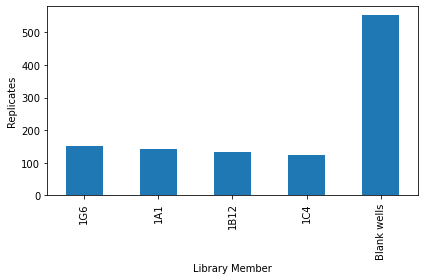

In [21]:
filename = 'My_library'
print_df, project_path = ap.generate_array(filename, library_df, total_columns, total_rows, skip_rows, column_names)

## Output `.fld` file-formatted position list

In [22]:
ap.display_fld(print_df, total_columns, total_rows)
ap.write_fld(project_path, filename, print_df, total_columns, total_rows)

1/1	1G6,	1,
1/2	1B12,	1,
1/3	1B12,	1,
1/4	1C4,	1,
1/5	1C4,	1,
1/6	1B12,	1,
1/7	1B12,	1,
1/8	1A1,	1,
1/9	1G6,	1,
1/10	1G6,	1,
1/11	1A1,	1,
1/12	1A1,	1,
1/13	1B12,	1,
1/14	1G6,	1,
1/15	1B12,	1,
1/16	1G6,	1,
1/17	1A1,	1,
1/18	1G6,	1,
1/19	1B12,	1,
1/20	1C4,	1,
1/21	1G6,	1,
1/22	1C4,	1,
1/23	1G6,	1,
1/24	1B12,	1,
2/1		,	1,
2/2		,	1,
2/3		,	1,
2/4		,	1,
2/5		,	1,
2/6		,	1,
2/7		,	1,
2/8		,	1,
2/9		,	1,
2/10		,	1,
2/11		,	1,
2/12		,	1,
2/13		,	1,
2/14		,	1,
2/15		,	1,
2/16		,	1,
2/17		,	1,
2/18		,	1,
2/19		,	1,
2/20		,	1,
2/21		,	1,
2/22		,	1,
2/23		,	1,
2/24		,	1,
3/1	1G6,	1,
3/2	1A1,	1,
3/3	1A1,	1,
3/4	1A1,	1,
3/5	1A1,	1,
3/6	1A1,	1,
3/7	1G6,	1,
3/8	1B12,	1,
3/9	1G6,	1,
3/10	1C4,	1,
3/11	1C4,	1,
3/12	1G6,	1,
3/13	1A1,	1,
3/14	1C4,	1,
3/15	1A1,	1,
3/16	1G6,	1,
3/17	1A1,	1,
3/18	1B12,	1,
3/19	1B12,	1,
3/20	1G6,	1,
3/21	1A1,	1,
3/22	1B12,	1,
3/23	1B12,	1,
3/24	1C4,	1,
4/1		,	1,
4/2		,	1,
4/3		,	1,
4/4		,	1,
4/5		,	1,
4/6		,	1,
4/7		,	1,
4/8		,	1,
4/9		,	1,
4/10		,	1,
4/11		,	1,
4/12		,	1,
4/1